In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(recent_date)

('2017-08-23',)


In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Calculate the date one year from the last date in data set.
known_date = dt.date(2017,8,23) - dt.timedelta(days=365)
print(known_date)

2016-08-23


In [17]:
# Starting from the most recent data point in the database. 
# Perform a query to retrieve the data and precipitation scores
years_prcp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= known_date, Measurement.prcp != None).order_by(Measurement.date).all()

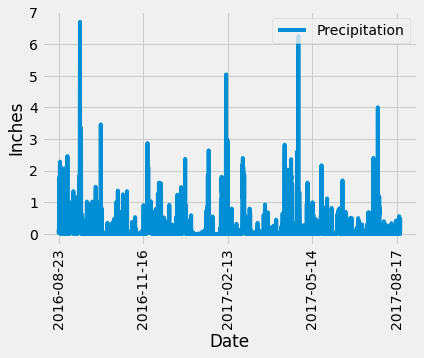

In [27]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(years_prcp, columns=['Date', 'Precipitation'])
# Sort the dataframe by date
df.set_index('Date', inplace=True)
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()
plt.xticks(rotation=90)
plt.ylabel('Inches')
plt.legend(loc='upper right');

In [20]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [28]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(func.count(Station.station)).all()
print(station_count)

[(9,)]


In [31]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [36]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
result = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
result

[(54.0, 85.0, 71.66378066378067)]

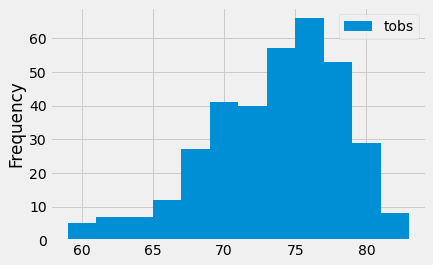

In [42]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
new_result = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281', Measurement.date >= known_date).order_by(Measurement.tobs).all()
station_frame = pd.DataFrame(new_result, columns=['tobs'])

bins=12
station_frame.plot.hist(result,bins);

# Close session

In [ ]:
# Close Session
session.close()